# GRU Model

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GRU ,Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


# Load and PreProcess 

In [2]:
loaded = np.load('data/pems08.npz')
sets = loaded.f.data
print(sets.shape)

(17856, 170, 3)


In [3]:
def get_data(road, features):
    datax = sets[:,0,:features]
    if road <=170:
        for k in range(1,road):
            datax = np.concatenate((datax ,sets[:,k,:features]))
    return datax

In [4]:
dataOG = get_data(1,2)
print(dataOG.shape)

(17856, 2)


In [5]:
# Load the data
dataBefore = dataOG[:,0].reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(dataBefore)

In [6]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]


In [7]:
# Create sequences of data
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length-1):
        x.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(x), np.array(y)

seq_length = 30
trainX, trainY = create_sequences(train_data, seq_length)
testX, testY = create_sequences(test_data, seq_length)

# Reshape the data for the LSTM model
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


# 1 feature model

In [8]:

# Define the model architecture
model = Sequential([
    GRU(64, input_shape=(seq_length, 1),return_sequences=True),
    GRU(32, return_sequences=True),
    GRU(64, return_sequences=False),
    Dense(1)
])
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


# Train & predict

In [9]:
# Train the model
model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY))

# Make predictions on the test data
testPredict = model.predict(testX)


Epoch 1/20
223/223 [==============================] - 20s 56ms/step - loss: 0.0082 - val_loss: 0.0027
Epoch 2/20
223/223 [==============================] - 11s 48ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 3/20
223/223 [==============================] - 10s 45ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 4/20
223/223 [==============================] - 11s 48ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 5/20
223/223 [==============================] - 11s 48ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 6/20
223/223 [==============================] - 11s 49ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 7/20
223/223 [==============================] - 11s 50ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 8/20
223/223 [==============================] - 11s 48ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 9/20
223/223 [==============================] - 11s 49ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 10/20
223/223 [==============================] - 11s 47ms/step - loss: 0.001

# Result

In [10]:
# Inverse transform the predictions and actual values
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
rmse = sqrt(mean_squared_error(testY[0],testPredict.reshape(-1,1)))

# Calculate R2 score
testYshape=testY.reshape(len(testY[0]),1)
r2s = r2_score(y_true=testYshape,y_pred=testPredict)

print('Test RMSE: %.2f' % rmse)
print('Test R2: %.2f' % r2s)

Test RMSE: 28.73
Test R2: 0.96


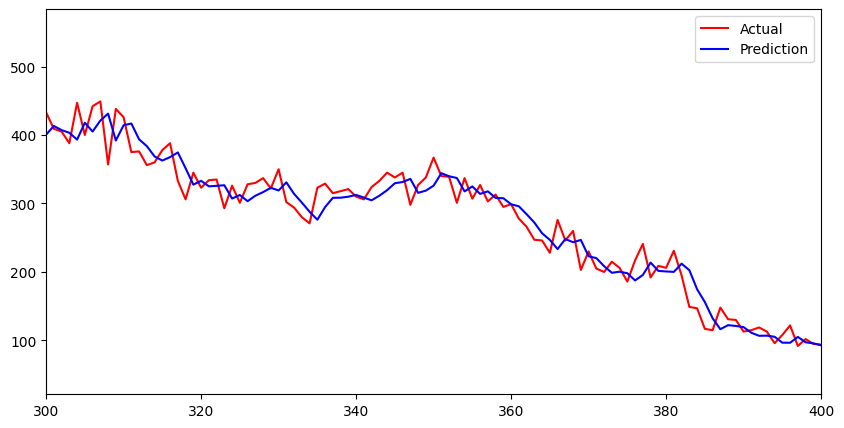

In [11]:
plt.figure(figsize=(10,5))
plt.plot(testYshape,color = 'red',label = 'Actual')
plt.plot(testPredict,color = 'blue',label = 'Prediction')
plt.legend()
plt.xlim(300,400)
plt.show()

In [12]:
plot_model(model, to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=True,
    dpi=80,
    layer_range=None,
    show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
